<a href="https://colab.research.google.com/github/krystianpoczewski/SIOC--zajecia/blob/main/compresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

(798, 1200, 3)

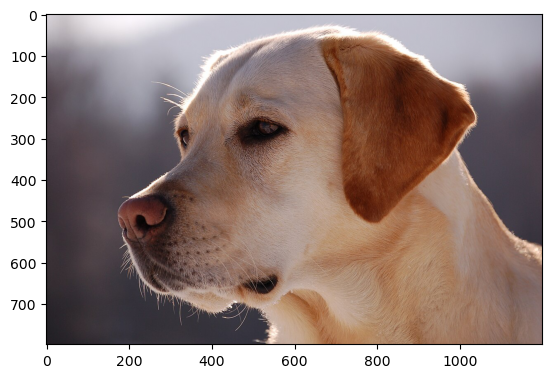

In [ ]:
img = plt.imread('dog.jpg')
img = img/img.max()
plt.imshow(img)
img.shape

Kompresja obrazu z FFT

In [ ]:
def compress_image_with_fft(img, compression_value):
    compressed_img = np.zeros_like(img)
    for channel in range(img.shape[2]):
        img_fft = np.fft.fft2(img[:, :, channel])
        img_fft_sort = np.sort(np.abs(img_fft.reshape(-1)))
        tresh = img_fft_sort[int(np.floor(compression_value * len(img_fft_sort)))]
        indexes = np.abs(img_fft)>tresh
        low_vals = img_fft * indexes
        Alow = np.fft.ifft2(low_vals).real
        compressed_img[:, :, channel] = Alow
    return np.clip(compressed_img, 0, 1)


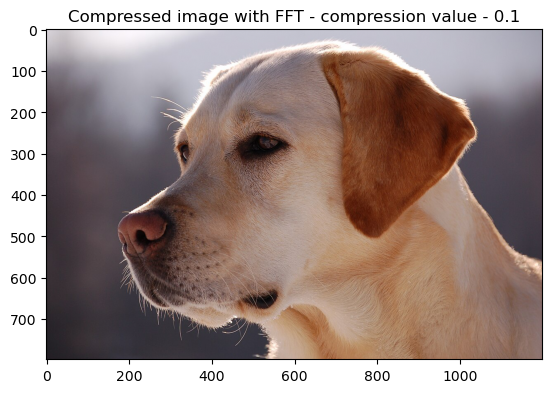

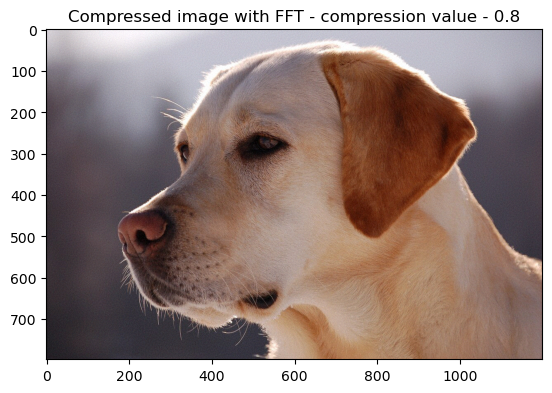

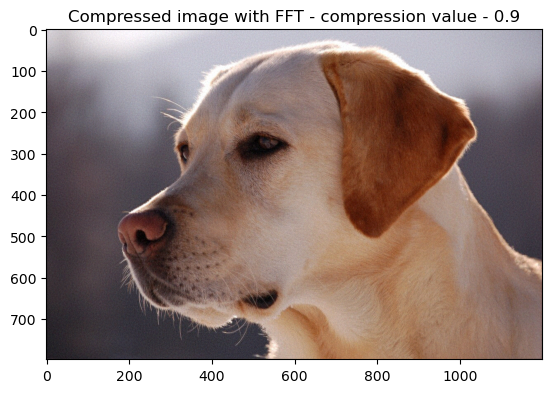

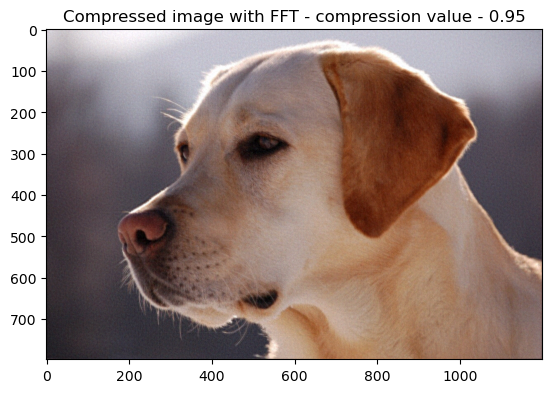

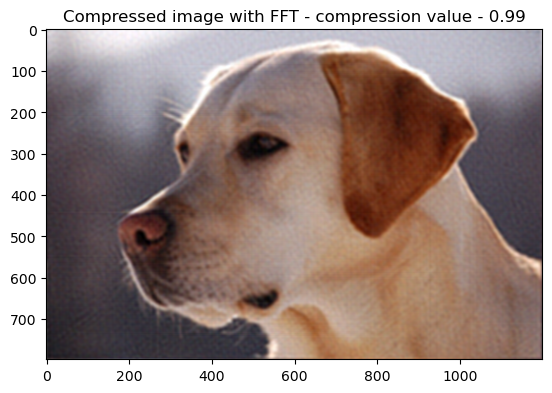

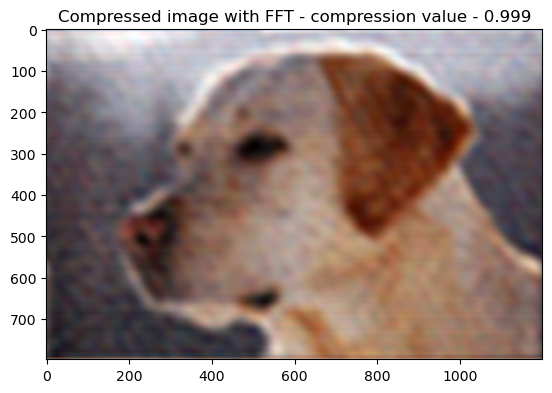

In [ ]:
compresion_values = [0.1, 0.8, 0.9, 0.95, 0.99, 0.999]

for value in compresion_values:
    compressed_img = compress_image_with_fft(img, value)
    plt.imshow(compressed_img)
    plt.title(f'Compressed image with FFT - compression value - {value}')
    plt.show()

Można zauważyć, że obraz z 95% mniej zajmującego miejsca jest prawie tak samy jak oryginalny.
Widoczną utrate jakości widać na jeszcze większych kompresjach.

Kompresja obrazu z Wavelet transform

In [ ]:
def compress_image_wavelet(img, compression_value):
    wavelet = 'db1'
    level = 2
    img_compressed = np.zeros_like(img)
    for channel in range(img.shape[2]):
        coeffs = pywt.wavedec2(img[:, :, channel], wavelet, level=level)
        coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
        Coeff_sort = np.sort(np.abs(coeff_arr.reshape(-1)))
        tresh = Coeff_sort[int(np.floor(compression_value * len(Coeff_sort)))]
        indexes = np.abs(coeff_arr)>tresh
        coeffs_filtered_arr = coeff_arr * indexes
        coeff_filtered = pywt.array_to_coeffs(coeffs_filtered_arr, coeff_slices, output_format='wavedec2')
        img_compressed[:, :, channel] = pywt.waverec2(coeff_filtered, wavelet)
    return np.clip(img_compressed, 0, 1)

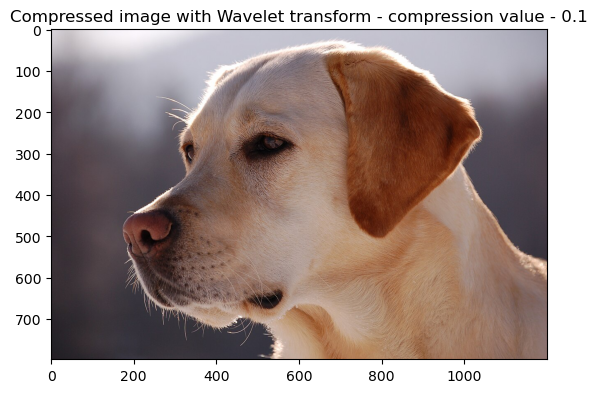

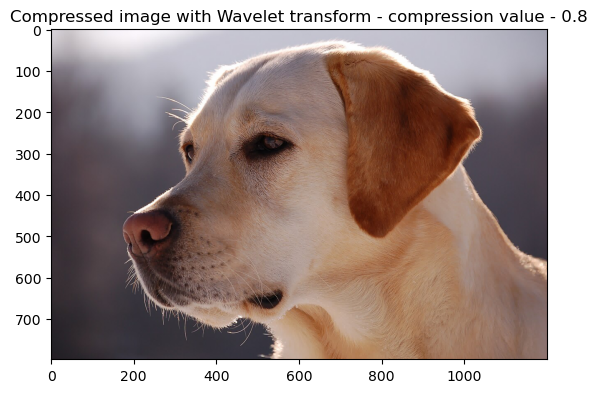

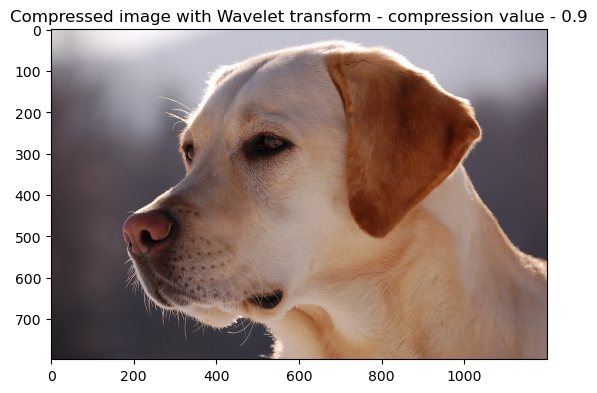

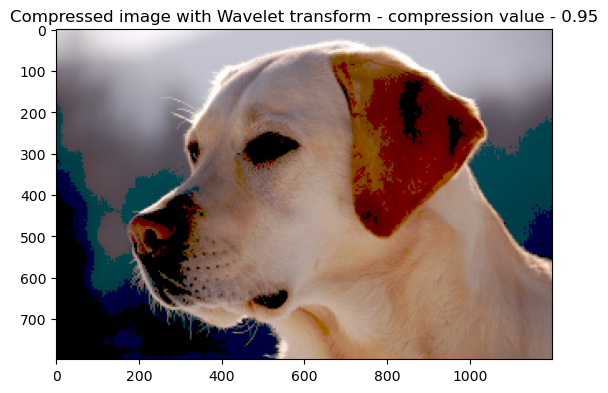

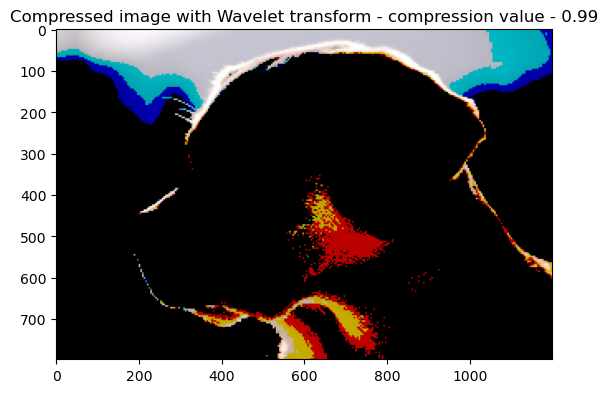

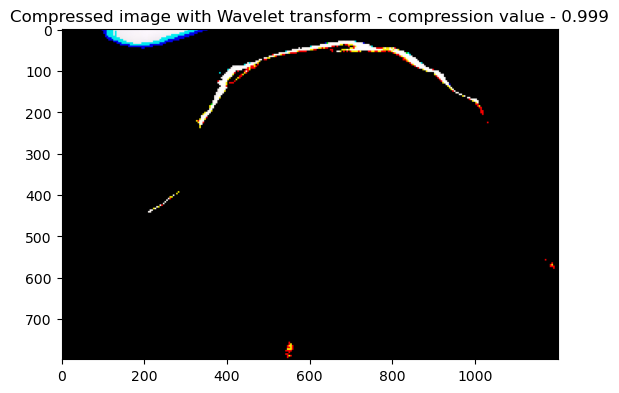

In [ ]:
compresion_values = [0.1, 0.8, 0.9, 0.95, 0.99, 0.999]

for value in compresion_values:
    compressed_img = compress_image_wavelet(img, value)
    plt.imshow(compressed_img)
    plt.title(f'Compressed image with Wavelet transform - compression value - {value}')
    plt.show()

W powyższym utrate danych mamy już przy kompresji 95%. W związku z czym dla tego obrazu kompresja z wykorzystaniem FFT jest lepsza. Warto jednak zauważyć, że przy kompresji transformacja falową mimo znacznej utraty jakości zarys pierwszego planuu obrazu wciąż jest lekko widoczny.

Porównanie obu kompresji na obrazie

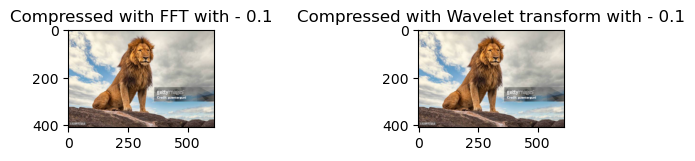

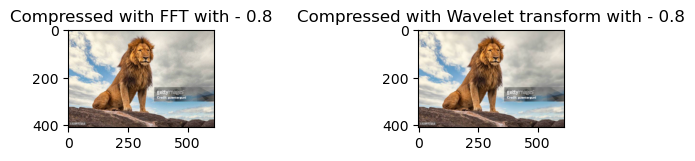

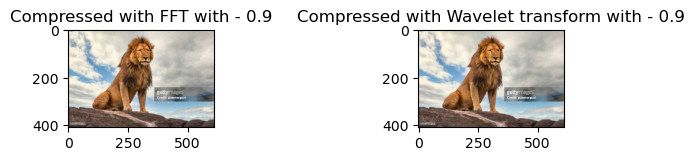

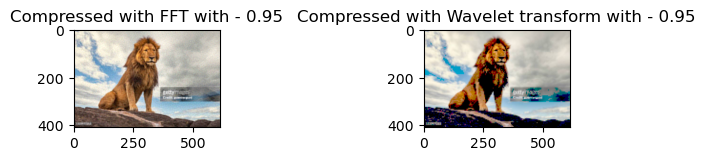

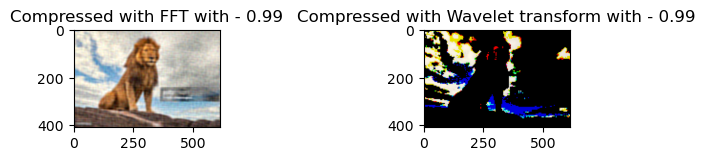

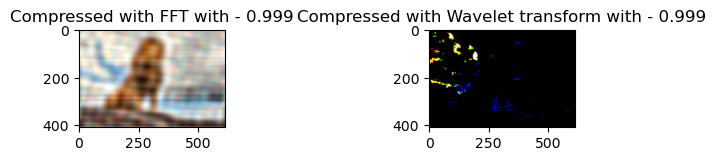

In [ ]:
high_res = plt.imread('lion.jpg')
high_res = high_res/high_res.max()
for value in compresion_values:
    f, ax = plt.subplots(1,2)
    ax[0].imshow(compress_image_with_fft(high_res, value), cmap='gray')
    ax[0].set_title(f'Compressed with FFT with - {value}')
    ax[1].imshow(compress_image_wavelet(high_res, value), cmap='gray')
    ax[1].set_title(f'Compressed with Wavelet transform with - {value}')
    plt.subplots_adjust(wspace=1.4)
    plt.show()

Widać, że FFT dużo lepiej radzi sobie z tym obrazem.